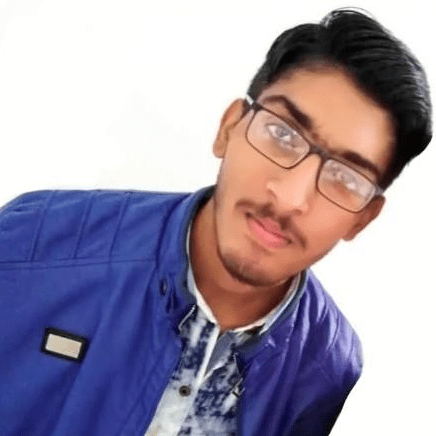

**Implemented By Muhammad Hanan Asghar**

**Importing Libraries**

In [4]:
!pip install keras

In [5]:
import numpy as np
import keras
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from keras import backend as k

**Importing and Loading Dataset**

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
print("Shape of Training",x_train.shape)
print("Shape of Testing",x_test.shape)

Shape of Training (60000, 28, 28)
Shape of Testing (10000, 28, 28)


**Converting out Dataset to Single Channel**

In [8]:
img_rows, img_cols=28, 28
  
if k.image_data_format() == 'channels_first': 
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
   inpx = (1, img_rows, img_cols) 
else:
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1)

In [9]:
print("Shape of Training",x_train.shape)
print("Shape of Testing",x_test.shape)

Shape of Training (60000, 28, 28, 1)
Shape of Testing (10000, 28, 28, 1)


In [10]:
# converting integers to float
#convert from integers to floats
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# Nor. 0 to 1
x_train /= 255
x_test /= 255

In [11]:
# Now converting To categorical or means one hot encoding
# convert class vectors to binary class matrices  OR one hot encode target values
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test)

In [12]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
# To prevent overfitting 
layer4 = Dropout(0.5)(layer3)
 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6)

In [13]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 1s 12ms/step - loss: 0.7148 - accuracy: 0.7430
Epoch 2/12
120/120 [==============================] - 1s 12ms/step - loss: 0.4100 - accuracy: 0.8528
Epoch 3/12
120/120 [==============================] - 1s 12ms/step - loss: 0.3531 - accuracy: 0.8723
Epoch 4/12
120/120 [==============================] - 1s 12ms/step - loss: 0.3231 - accuracy: 0.8831
Epoch 5/12
120/120 [==============================] - 1s 12ms/step - loss: 0.2988 - accuracy: 0.8914
Epoch 6/12
120/120 [==============================] - 1s 12ms/step - loss: 0.2812 - accuracy: 0.8973
Epoch 7/12
120/120 [==============================] - 1s 12ms/step - loss: 0.2644 - accuracy: 0.9039
Epoch 8/12
120/120 [==============================] - 1s 12ms/step - loss: 0.2523 - accuracy: 0.9081
Epoch 9/12
120/120 [==============================] - 1s 12ms/step - loss: 0.2393 - accuracy: 0.9126
Epoch 10/12
120/120 [==============================] - 1s 12ms/step - loss: 0.2276 - accura

In [14]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Loss=', score[0]) 
print('Accuracy=', score[1])

Loss= 0.23082321882247925
Accuracy= 0.9168000221252441




```
Labels

0. T-Shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle Boot
```



In [21]:
labels = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [18]:
#sinle Value predication in number
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[575])))

8


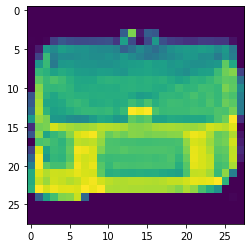

In [19]:
#sinle Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(x_test[575].reshape(28, 28))
plt.show()

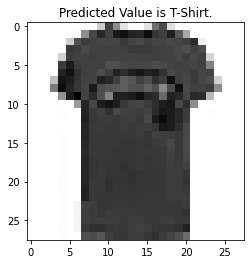

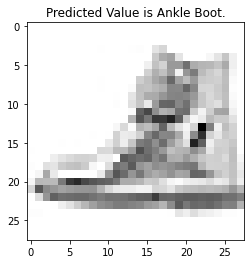

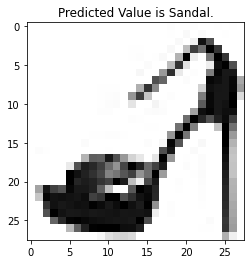

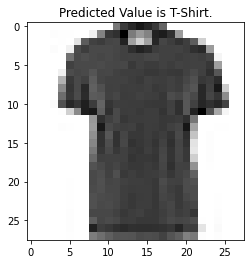

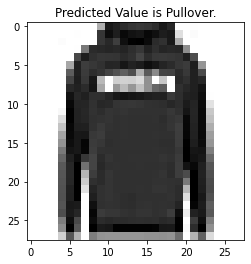

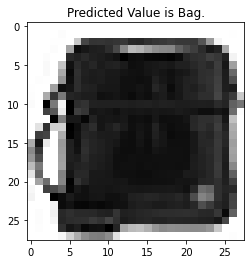

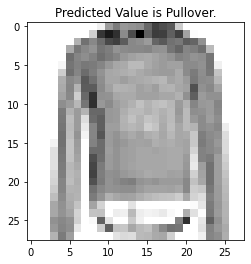

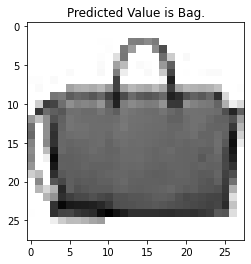

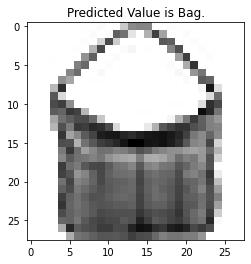

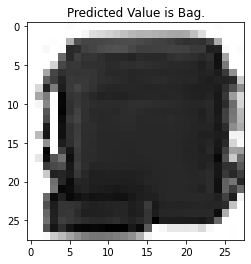

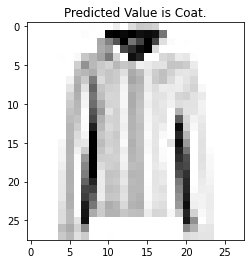

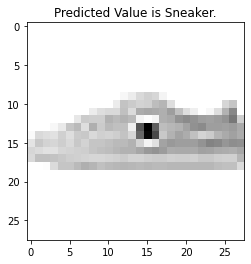

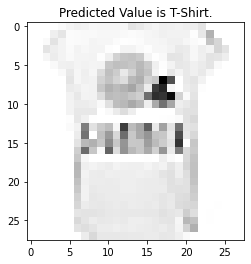

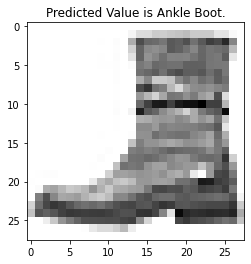

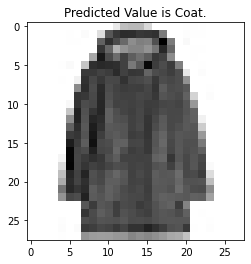

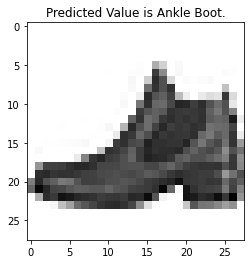

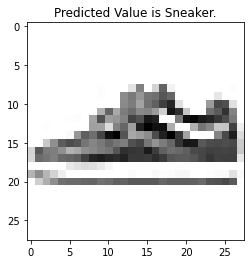

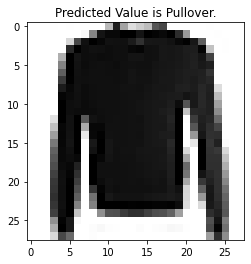

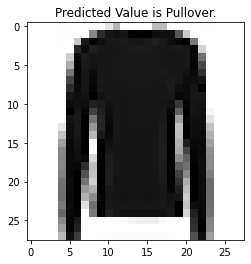

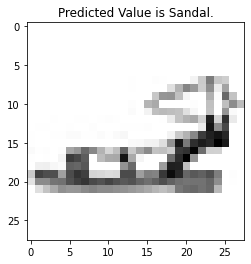

In [23]:
import random
# To convert to binary or black and white use # cmap = plt.cm.binary
for _ in range(20):
  value = random.randint(0,700)
  code = np.argmax(np.round(predictions[value]))
  plt.imshow(x_test[value].reshape(28, 28), cmap = plt.cm.binary)
  plt.title(f"Predicted Value is {labels[code]}.")
  plt.show()